
   # TP Rendu - Biologie du Système

### MBODJ ASSANE 
### M2 BCD 

## Importation des librairies

In [1]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
import scipy as sp
import sympy as sym
from sympy import log
from sympy import exp
%matplotlib inline

# Partie 1 : cas non régulé

## Question 1 Montrez par analyse du point fixe de cette équation que dans ce cas A(t) converge vers α β pour toutes les conditions initiales.

### dA/dt = beta-alpha(A)

### Définition scalaire et vectorielle de la fonction à tracer

In [2]:
dx = 0.01
x_Min=0
x_Max=10
x_array=np.arange(x_Min,x_Max,dx)



### Determination des point fixes 
La determination des points fixes nous permet de savoir si on a u n point fixe stable ou un point fixe instable. Ce qui va nous donner une idée sur les courbes d'évolution dans le temps pour toutes les conditions initiales


## Cas où apha < beta

Text(0.5, 1.0, 'Courbe avec beta>alpha')

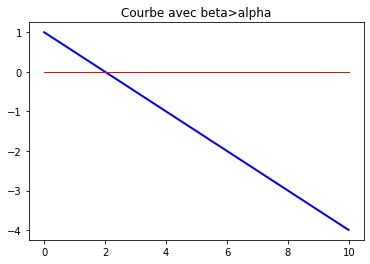

In [3]:

def F(x,alpha,beta):
    output=beta-alpha*x
    return output

def F_array(x_array,alpha, beta):

    output=np.zeros(len(x_array))
    for i in range(0, len(x_array)):
        output[i]=F(x_array[i], alpha,beta)
    return output
alpha=0.5
beta=1
plt.figure(1)
plt.plot(x_array,F_array(x_array, alpha, beta), 'b', linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))), 'r', linewidth=1)
plt.title("Courbe avec beta>alpha")


## Cas où alpha>beta

Text(0.5, 1.0, 'Courbe avec beta<alpha')

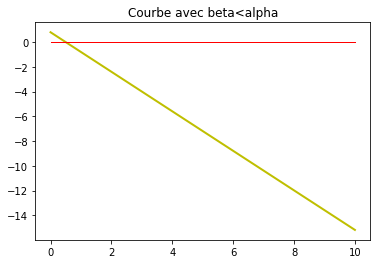

In [4]:
alpha=1.6
beta=0.8
plt.figure(1)
plt.plot(x_array,F_array(x_array,alpha,beta), 'y', linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))), 'r', linewidth=1)
plt.title("Courbe avec beta<alpha")


Dans les deux cas de figures , on observe un seul point fixe unique 

## Question 2 Montrez par des simulations appropriées que seul α a une influence sur le temps d’évolution nécessaire pour converger vers le point fixe.

Une varition de alpha donne des valeurs de points fixes basses. Ce qui affecte la stabilité. Plus alpha est augmenté plus la stabilité est obtenue rapidement. Donc alpha influence bien la stabilisation des points fixes

## Calul de la dérivée

Cela est permis grace à la fonction brentq présente dans la bibliothèque optimize de Python. Cette fonction est capable de trouver un point où une fonction s’annule.

Trouvons les valeurs des points fixes numériquement

In [5]:
import scipy.optimize
alpha=1.6
beta=0.8
x_1=-1.5
x_2=4.5
root=scipy.optimize.brentq(F,x_1,x_2, args=(alpha,beta))
print("root",root)
print("beta/alpha est égale à ",beta/alpha)

#Équation formelle 
def F_formel(x,alpha,beta):
    output=beta-alpha*x
    return output

x = sym.symbols('x')
alpha = sym.symbols('alpha')
beta = sym.symbols('beta')
Fprime = sym.diff(F_formel(x,alpha,beta),x)
print(" F' : ", Fprime)
print(" F'(root) : ", Fprime.evalf(subs={x:root,alpha:1.6,beta:0.8}))

root 0.5
beta/alpha est égale à  0.5
 F' :  -alpha
 F'(root) :  -1.60000000000000


La dérivée est négatif donc on est dans le cas d'un point fixe stable
Une évaluation de alpha à la racine de F' est égale à -1.6. Ce qui nous donne un point fixe stable.













Une variation de alpha influence le temps d'évolution des courbe. Des valeurs de alpha grande influence perturbent le temps d'évolution des courbent qui retrécissent et concergent vers le point fixe

### Variation de alpha

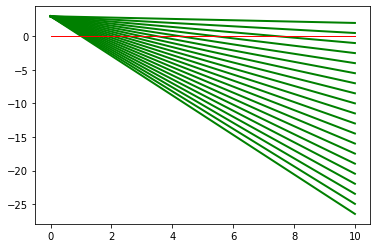

In [6]:
alpha_array=np.arange(0.1,3,0.15)
beta=3
plt.figure(1)
for i in range(0,len(alpha_array)):
    code=alpha_array[i]/5
    plt.plot(x_array,F_array(x_array,alpha_array[i],beta),'g',linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'r',linewidth=1)

# Partie 2: Auto-Inibition: Cas réguler

In [7]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize
import sympy as sym
from sympy import log
from scipy.integrate import odeint

## Équation avec regulation: Autoinhibition

In [8]:

def F_inhib(x,alpha,beta,k):
    output= beta*(1/(1+(x/k)**n))-alpha*x
    return output

def Finhib_array(x_array,alpha,beta,k):
    output=np.zeros(len(x_array))
    for i in range(0,len(x_array)):
        output[i]=F_inhib(x_array[i],alpha,beta,k)       
    return output


## Analyses et détermination des points fixes

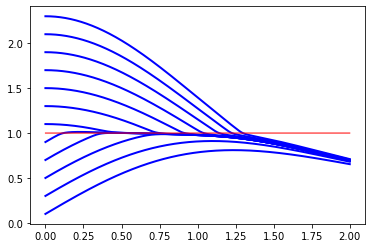

In [9]:

t_Min=0
t_Max=2
dt=0.001
t_array=np.arange(t_Min,t_Max,dt)

#Conditions initiales
x_initial=np.arange(0.1,2.5,0.2)

#Intégration Numérique
alpha=1
beta=1
k=1
n=100
x_array=np.zeros((len(t_array),len(x_initial)))
for i in range(0,len(x_initial)):
    output = odeint(F_inhib,x_initial[i],t_array,args=(alpha,beta))
    x_array[:,i]=output[:,0]
    

#Tracé de l'évolution temporelle pour différentes conditions initiales
    
plt.figure(1)
for i in range(0,len(x_initial)):
    plt.plot(t_array,x_array[:,i],'b',linewidth=2)
plt.plot(t_array,np.ones((len(t_array))),'r',linewidth=1)
#plt.title("Courbe F Inhib (A) pour différents jeux de paramètres α, β et K.")

In [10]:
dx=0.001
x_Min=0.01
x_Max=3
x_array=np.arange(x_Min,x_Max,dx)

## Variation de la valeur de k en fixant beta/alpha

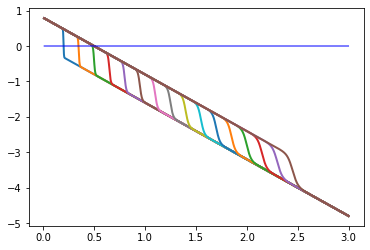

In [11]:
k_array=np.arange(0.2,2.5,0.15)
alpha=1.6
beta=0.8
plt.figure(1)
for i in range(0,len(k_array)):
    plt.plot(x_array,Finhib_array(x_array,alpha,beta,k_array[i]),linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'b',linewidth=1)

Pour des valeurs de k qui varient entre 0.2 et 2.5, on a 2 points fixes dont les valeurs augmentent tant que k est inferieur au rapport beta/alpha. Une valeur de k qupérieur au rapport beta/alpha entraine une diminution des points fixes

## Variation de la valeur de  beta/alpha en fixant k

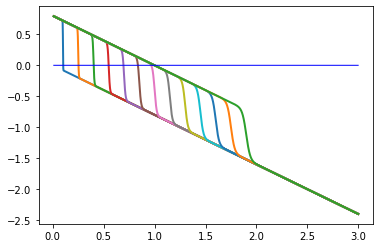

In [12]:
z=(beta/alpha)
z_array=np.arange(0.1,2,0.15)
k=0.8
plt.figure(1)
for i in range(0,len(z_array)):
    plt.plot(x_array,Finhib_array(x_array,k,beta,z_array[i]),linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'b',linewidth=1)

En fixant k et fait varier le rapport beta/alpha, on obtient plus de points fixes

### Cas où k=<beta/alpha

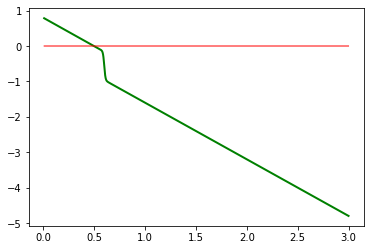

In [13]:
alpha=1.6
beta=0.8
k=0.6
plt.figure(1)
#subplot(1,2,2)
plt.plot(x_array,Finhib_array(x_array,alpha,beta,k), 'g',linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'r',linewidth=1)



On observe un seul point d'intersection avec l'axe des abscisses

### Detrmination de la valeur du point fixe et du rapport beta/alpha

In [14]:
alpha=1.6
beta=0.8
k=0.6
x_1=0
x_2=0.6

root1 = scipy.optimize.brentq(F_inhib,x_1,x_2,args=(alpha,beta,k))
print("root1 : ", root1)
print("beta/alpha est égale à" , beta/alpha)



root1 :  0.4999999939626706
beta/alpha est égale à 0.5


on obtient une valeur de root tres proche du rapport beta/alpha

### cas ou k >=beta/alpha

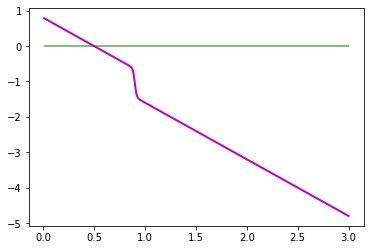

In [15]:
alpha=1.6
beta=0.8
k=0.9
plt.figure(1)
#subplot(1,2,2)
plt.plot(x_array,Finhib_array(x_array,alpha,beta,k), 'm',linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'g',linewidth=1)


### Detrmination de la valeur du point fixe et du rapport beta/alpha

In [16]:
alpha=1.6
beta=0.8
k=0.9
x_1=-2
x_2=0.6

root1 = scipy.optimize.brentq(F_inhib,x_1,x_2,args=(alpha,beta,k))
print("root2 : ", root1)
print("beta/alpha est égale à" , beta/alpha)

root2 :  0.5
beta/alpha est égale à 0.5


On obtient dans le cas où k>=beta/alpha, une valeur du point fixe qui est égale au rapport beta/alpha donc c'est dans ce cas où on a une valeur très proche du point fixe






### Dermination numérique du point fixe pour savoir la nature du point fixe

In [17]:
def F_inhib_formel(x,a,b,k):
    output= beta*(1/(1+(x/k)**n))-alpha*x
    return output


x = sym.symbols('x')
alpha = sym.symbols('a')
beta = sym.symbols('b')
k = sym.symbols('k')

Fprime = sym.diff(F_inhib_formel(x,alpha,beta,k),x)
print("F' =", Fprime)
print( "pour la racine'(root) =", Fprime.evalf(subs={x:root1,alpha:1.6,beta:0.8, k:0.6}))


F' = -a - 100*b*x**99/(k**100*(1 + x**100/k**100)**2)
pour la racine'(root) = -1.60000193194771


La détermination de la valeur du point fixe qui est l'intersection avec l'axe des abscisses on se rend compte que cette valeur est négatif donc on a un point fixe stable.

## Pertinence biologique

Si on compare avec le cas non régulé avec le cas régulé d'autonhibition, on peut dire que le cas régulé est plus pertinent. Par exemple si on prend le cas de la régulation de la proteine p53 dans la régulation du cycle cellulaire
Cette protèine p53 se comporte en suppresseur de tumeur en exercant une régulation négatif en entrainant un arrêt de la croissance cellulaire ou l’apoptose en réponse à un grand nombre de stress cellulaires.

# Partie 3: Auto-amplification  Cas Réguler

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize
import sympy as sym
from sympy import log
from scipy.integrate import odeint

## Définition de l'intervalle et de la discrétisation

In [19]:
def F_ampli(x,alpha,beta,k):
    output = beta*(((x/k)**100)/(1+(x/k)**100)) - alpha*x #avec n=100
    return output

def Fampli_array(x_array,alpha,beta,k):
    output=np.zeros(len(x_array))
    for i in range(0,len(x_array)):
        output[i]=F_ampli(x_array[i],alpha,beta,k)       
    return output

In [20]:
dx=0.001
x_Min=0.01
x_Max=2
x_array=np.arange(x_Min,x_Max,dx)

## Variation de la valeur de k en fixant beta/alpha

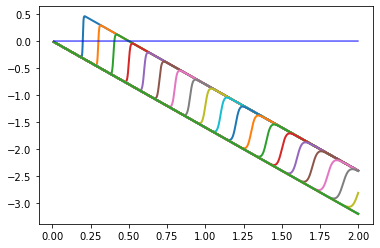

In [21]:
k_array=np.arange(0.2,2.5,0.1)
alpha=1.6
beta=0.8
plt.figure(1)
for i in range(0,len(k_array)):
    plt.plot(x_array,Fampli_array(x_array,alpha,beta,k_array[i]),linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'b',linewidth=1)

## Variation de la valeur de  beta/alpha en fixant k

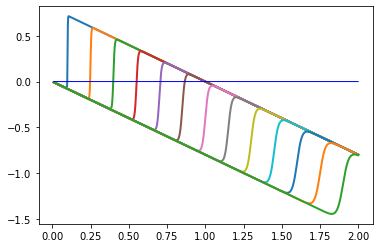

In [22]:
z=(beta/alpha)
z_array=np.arange(0.1,2,0.15)
k=0.8
plt.figure(1)
for i in range(0,len(z_array)):
    plt.plot(x_array,Fampli_array(x_array,k,beta,z_array[i]),linewidth=2)
plt.plot(x_array,np.zeros((len(x_array))),'b',linewidth=1)

On voit que la variation de k et du rapport beta/alpha influencent les intersections de la courbe avec l'axe horizontal.

### Cas où K< beta/alpha

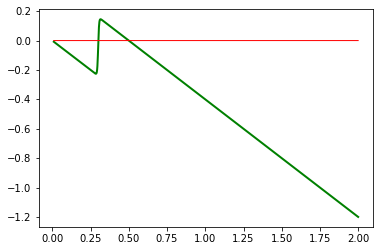

In [23]:
alpha=0.8
beta=0.4
k=0.3

plt.figure(1)
plt.plot(x_array,Fampli_array(x_array,alpha,beta,k), 'g',linewidth=2, label = 'Cas régulé')
plt.plot(x_array,np.zeros((len(x_array))),'r',linewidth=1)


On observe dans le cas ou k<beta/alpha trois points d'intersections avec l'axe horizontal qui correspondent à des points fixes 

### Cas où K>beta/alpha

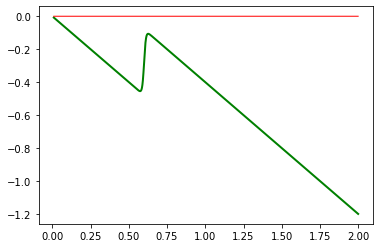

In [24]:
alpha=0.8
beta=0.4
k=0.6

plt.figure(1)
plt.plot(x_array,Fampli_array(x_array,alpha,beta,k), 'g',linewidth=2, label = 'Cas régulé')
plt.plot(x_array,np.zeros((len(x_array))),'r',linewidth=1)


Dans la deuxième cas, on voit dans l'axe horizontal un seul point fixe.
Cela montre que le paramètres K et le rapport beta/alpha ont une influence sur les intersections de la courbe avec l’axe horizontal, donc sur la position des points fixes.


## Stabilité des points fixes

### Questions 11


### Recherche de la nature du point fixe par l’analyse numérique des valeurs de la dérivée.

Cela est permis grace à la fonction brentq présente dans la bibliothèque optimize de Python. Cette fonction est capable de trouver un point où une fonction s’annule.

### Cas où k<beta/alpha

In [25]:
alpha=0.8
beta=0.4
k=0.3
x_1=0
x_2=0.8
x_3=-2
x_4=6
x_5=0.4
x_6=0.1
root1 = scipy.optimize.brentq(F_ampli,x_1,x_2,args=(alpha,beta,k))
root3 = scipy.optimize.brentq(F_ampli,x_3,x_4,args=(alpha,beta,k))
root2 = scipy.optimize.brentq(F_ampli,x_5,x_6,args=(alpha,beta,k))
print("root 1  : ", root1)
print("root 2  : ", root2)
print("root 3  : ", root3)
print("rapport beta/alpha :" , beta/alpha)
roots=[root1,root2,root3]

root 1  :  0.0
root 2  :  0.3012502834260165
root 3  :  0.5
rapport beta/alpha : 0.5


On a des valeurs de la racine qui correspondent exatement aux points d'intersections obtenus dans le premier cas c-a-d k<beta/alpha. Ces valeurs correspondent à des points fixes. Reste à déterminer leurs types si sont instables ou stables. Pour cela nous allons utiliser la fonction
symbolique de python qui calcul la dérivée d'une fonction. On voit que root3 est égale au rapport beta/alpha. Donc c'est dans ce cas où on a une valeur proche du point fixe.

In [26]:
def F_ampli_formel(x,a,b,k):
    output=beta*((x/k)**100/(1+(x/k)**100))-alpha*x
    return output

x = sym.symbols('x')
alpha = sym.symbols('a')
beta = sym.symbols('b')
k = sym.symbols('k')

Fprime = sym.diff(F_ampli_formel(x,alpha,beta,k),x)
print("F_ampli' =", Fprime)
for i in roots:
    print( "la racine ", i , "=",
          Fprime.evalf(subs={x:i,alpha:0.8,beta:0.4,k:0.3}))


F_ampli' = -a + 100*b*x**99/(k**100*(1 + x**100/k**100)) - 100*b*x**199/(k**200*(1 + x**100/k**100)**2)
la racine  0.0 = -0.800000000000000
la racine  0.3012502834260165 = 30.9999546518374
la racine  0.5 = -0.800000000000000


On voit qu'on a deux dérivés négatifs dans la racine 0 et la racine 0.5 qui correspondent à des points fixes stables. Et une dérivée positif dans la racine 0.20 qui correspond à un point fixe instable

### Cas où k>beta/alpha

In [27]:
alpha=0.8
beta=0.4
k=0.6
x_1=0
x_2=0.8
root = scipy.optimize.brentq(F_ampli,x_1,x_2,args=(alpha,beta,k))
print("root'  : ", root1)
print("beta/alpha est égale à" , beta/alpha)

root'  :  0.0
beta/alpha est égale à 0.5


la valeur de la racine correspond exatement au point d'intersection qui est le seul point fixe observé dans le cas où k est supérieur au rapport beta/alpha.

In [28]:
def F_ampli_formel(x,a,b,k):
    output=beta*((x/k)**100/(1+(x/k)**100))-alpha*x
    return output

x = sym.symbols('x')
alpha = sym.symbols('a')
beta = sym.symbols('b')
k = sym.symbols('k')

Fprime = sym.diff(F_ampli_formel(x,alpha,beta,k),x)
print("F_ampli' =", Fprime)
print( "pour la racine'(root) =", Fprime.evalf(subs={x:root,alpha:0.8,beta:0.4, k:0.6}))


F_ampli' = -a + 100*b*x**99/(k**100*(1 + x**100/k**100)) - 100*b*x**199/(k**200*(1 + x**100/k**100)**2)
pour la racine'(root) = -0.800000000000000


# Pertinence biologique

Le cas K<=beta/alpha présente une richesse
suffisante pour avoir une pertinence biologique car on a une variation de la nature des points fixes. Si on prends l'exemple d'une régulation allostérique dans la cellule. Par exemple  La PFK-1 joue un rôle primordial dans la régulation du flux de la glycolyse. En effet la PFK-1 possède un site de fixation de l'ATP en tant que substrat (effet homotrope) et un site de fixation en tant qu'effecteur (effet hétérotrope). Cette enzyme réagit différemment en fonction de la quantité d'ATP, qui est le produit final « utile » de la glycolyse. À faible concentration, l'ATP se fixe sur le site "coenzyme" de l'enzyme, entraînant de fait toute l'enzyme sous sa forme relâchée. À forte concentration, l'ATP se fixe sur le site "inhibiteur" de l'enzyme, entraînant de fait toute l'enzyme sous sa forme tendue.

# Conclusion 

Nous avons étudié trois cas de systèmes différents. Le premier système est l'equation non réguler la plus simple où on a une évolution
de la protéine A correspondant à une production constante dont le cas intérressant biologiquement est celui de la variation de A(t) et du rapport beta/alpha. Dans ce cas , nous avons observé une stabilité de la courbe caractérisé par un seul point fixe.
Nous avons aussi étudié un système d'autoinhibition avec des variation du paramètre k et du rapport beta/alpha. Nous avons vu que la variaion de ces paramètre influencait l'évolution de la courbe dans le temps. Nous avons aussi observé qu'en variant les cobditions, on obtenait un seul point fixe en fixant k ou beta/alpha , ce point fixe caractérise un point fixe stable.
Nous avons vu dans la dernière partie un système d'auto-amplification avec les même conditions dans le cas de l'auto-inhibition, ici on a observé plusieurs points fixes en faisant varier k et beta/ alpha. Ceertains points fixes étaient instables alors que d'autres étaient stables avec des valeurs de points fixes différents. On a observé aussi le nombre de points fixes obtenus dépendait de la variation du paramètre k.  